## 1- Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 2- Global Histogram

Text(0.5, 1.0, 'After global histogram equalization')

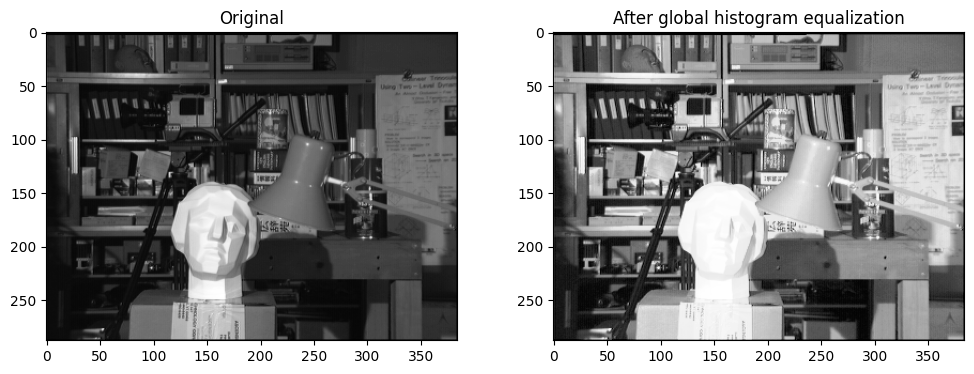

In [2]:
image = cv2.imread('images/statue.png', 0)
result = cv2.equalizeHist(image)

plt.figure(figsize=[12,4])
plt.subplot(121);plt.imshow(image, cmap='gray');plt.title("Original")
plt.subplot(122);plt.imshow(result, cmap='gray');plt.title("After global histogram equalization")

## 3- CLAHE Histogram

Text(0.5, 1.0, 'After adaptive histogram equalization')

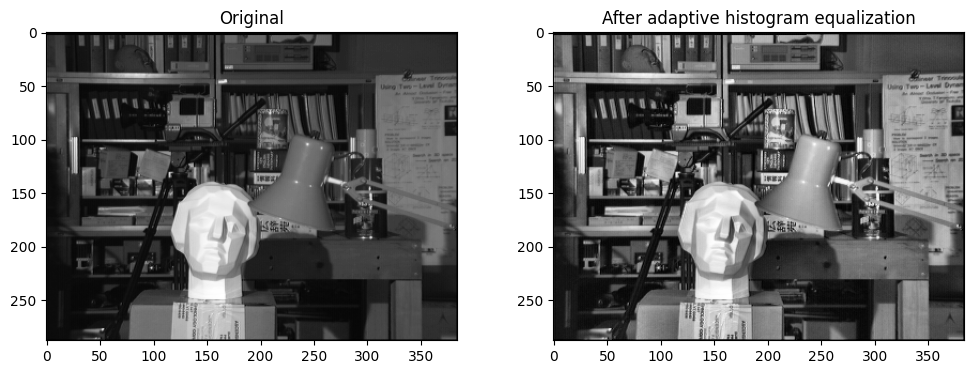

In [3]:
image = cv2.imread('images/statue.png', 0)

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
result = clahe.apply(image)

plt.figure(figsize=[12,4])
plt.subplot(121);plt.imshow(image, cmap='gray');plt.title("Original")
plt.subplot(122);plt.imshow(result, cmap='gray');plt.title("After adaptive histogram equalization")

## 4- Colored Image Equalization

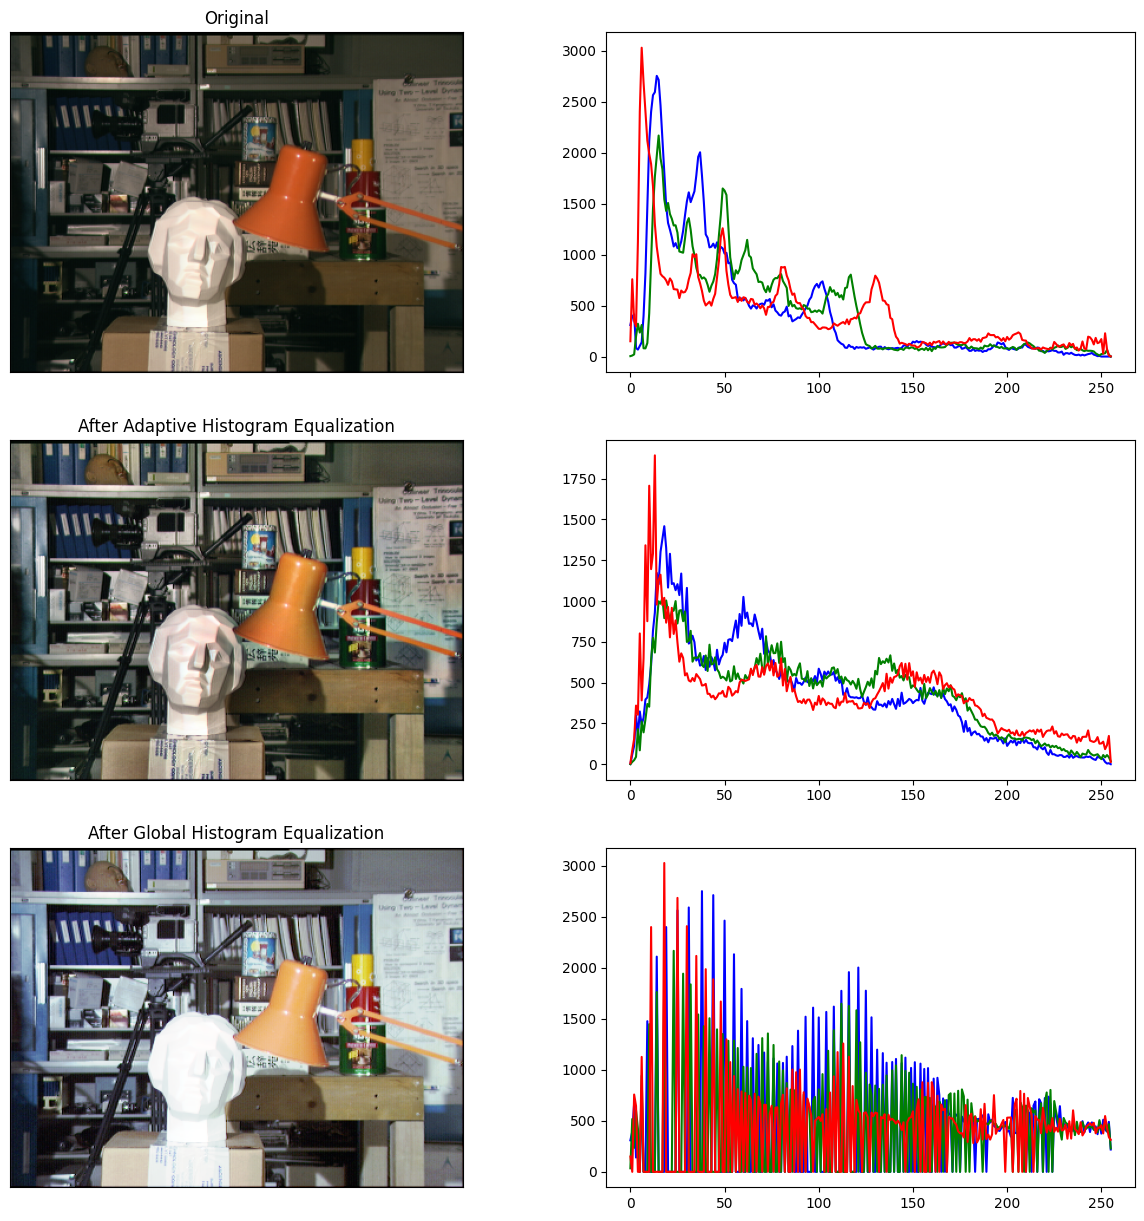

In [5]:
image = cv2.imread('images/statue.png')

# Histogram Equalization
channels = cv2.split(image)

#Adaptive method(CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
eq_channels = []
for ch in channels:
    eq_channels.append(clahe.apply(ch))
eq_clahe_image = cv2.merge(eq_channels)

#Global method
eq_channels = []
for ch in channels:
    eq_channels.append(cv2.equalizeHist(ch))
eq_image = cv2.merge(eq_channels)

#plot images
plt.figure(figsize=[15,15])
plt.subplot(321);plt.imshow(image[...,::-1]);plt.xticks([]);plt.yticks([]);plt.title("Original")
plt.subplot(323);plt.imshow(eq_clahe_image[...,::-1]);plt.xticks([]);plt.yticks([]);plt.title("After Adaptive Histogram Equalization")
plt.subplot(325);plt.imshow(eq_image[...,::-1]);plt.xticks([]);plt.yticks([]);plt.title("After Global Histogram Equalization")


color = ('b', 'g', 'r')
#Original image histogram
plt.subplot(322)
for i, col in enumerate(color):
    histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)

#Equualized image histogram with Adaptive method
plt.subplot(324)
for i, col in enumerate(color):
    histogram = cv2.calcHist([eq_clahe_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)
    
#Equualized image histogram with Global method
plt.subplot(326)
for i, col in enumerate(color):
    histogram = cv2.calcHist([eq_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)